# Trabajo Pr치ctico: Extracci칩n de Petr칩leo 游띡勇끂n
Este notebook implementa la resoluci칩n de una ecuaci칩n diferencial ordinaria (EDO) que modela el perfil de temperatura radial en una tuber칤a de extracci칩n de petr칩leo de alta presi칩n y temperatura.

Se resuelve el siguiente problema de valor en la frontera:


$$
r \cdot \frac{d^2T}{dr^2} + \frac{dT}{dr} = 0
$$



Con condiciones de borde (padr칩n 110616):

- $$ T(r_1) = T_1 = 406^\circ C $$
- $$ T(r_2) = T_2 = 16^\circ C $$

Usaremos el **m칠todo del tiro** junto con **Euler** para resolverlo num칠ricamente.


## ctes:

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del problema

R1 = 101.6  # mm
R2 = 113.6  # mm

T1 = 406    # 춿C
T2 = 16    # 춿C

S1 = -100 # valor inicial del primer tiro
S2 = -1 # valor inicial del segundo tiro

h = 1.0 #paso de 1 mm

resultados = {}

## M칠todo del Tiro 游꿢




In [51]:
def u_real(r):
    A = (T1 - T2) / (np.log(R1) - np.log(R2))
    B = T1 - A * np.log(R1)
    return A * np.log(r) + B

In [52]:
# Soluci칩n exacta para comparar
def T_exacta(r):
    return (T1 - T2) * np.log(R2 / r) / np.log(R2 / R1) + T2

def metodo_del_tiro(h, func):
    s1, s2 = S1, S2  # valores iniciales tentativos

    r, u1 = func(s1, h)
    resultados["euler_explicito_tiro_1"] = (r, u1)
    r, u2 = func(s2, h)
    resultados["euler_explicito_tiro_2"] = (r, u2)

    # Interpolaci칩n lineal (una sola vez)
    s_new = s2 + ((s1-s2)/(u1[-1] - u2[-1])) * (T2-u2[-1])

    #print(f"\n Derivada inicial interpolada: {s_new:.6f}")

    # Ejecutar Euler una sola vez con la derivada corregida
    r, u3 = func(s_new, h)

    resultados["euler_explicito_tiro_3"] = (r, u3)



    return r, u3, s_new


def imprimir_resultados_metodo_del_tiro(r, u3, s_new):

    print(f"{2:9d} | {s_new:8.4f} | {u3[-1]:11.6f} | {abs(u3[-1] - T2):.6f}")

    print(f"\nError final real: {abs(u3[-1] - T2):.12f}")

    # Mostrar error en cada paso comparado con soluci칩n exacta
    print("\n游늳 Errores punto a punto respecto a la soluci칩n exacta:")
    print("Paso | r        | u_num      | u_exact    | Error")
    print("------------------------------------------------------")
    for i in range(len(r)):
        r_i = r[i]
        u_i = u3[i]
        u_ex = u_real(r_i)
        error = abs(u_i - u_ex)
        print(f"{i:4d} | {r_i:8.2f} | {u_i:10.4f} | {u_ex:10.4f} | {error:8.4f}")



In [53]:
def tolerance_reduction(h_max, func, tolerance, max_iterations=20):
    """
    Encuentra el valor m치s grande de h en [h_min, h_max] tal que el error m치ximo sea <= tolerance.
    Usa b칰squeda binaria.
    """
    iter_count = 0
    h_opt = h_max  # Lo inicializamos en el m치ximo
    h_min = 0

    while (h_max - h_min) > 1e-6 and iter_count < max_iterations:
        h_mid = (h_min + h_max) / 2.0
        print(f"\n=== Ejecutando con h = {h_mid:.5f} mm ===")
        r, u, s_final = metodo_del_tiro(h_mid, func)

        errores = [abs(u[i] - u_real(r[i])) for i in range(len(r))]
        error_max = max(errores)

        print(f"M치ximo error punto a punto: {error_max:.6f} 춿C")

        if error_max < tolerance:
            # Puede que haya uno m치s grande que tambi칠n cumpla la condici칩n
            h_min = h_mid
            h_opt = h_mid
        else:
            # Demasiado grande, reducir
            h_max = h_mid

        iter_count += 1

    print(f"\nPaso final elegido: {h_opt:.5f} mm con error m치ximo de {error_max:.6f} 춿C")
    r, u, s_final = metodo_del_tiro(h_opt, func)
    imprimir_resultados_metodo_del_tiro(r, u, s_final)


## Euler Explicito

### codigo


In [54]:
def euler_system(s, h):
    r = R1
    u = T1
    v = s

    r_values = [r]
    u_values = [u]
    v_values = [v]

    n = 0
    while r < R2:
        u = u + h * v
        #print(u, v)
        v = v + h * (-v / r)
        r = R1 + h * (n + 1)
        n += 1

        r_values.append(r)
        u_values.append(u)
        v_values.append(v)

    # Imprimir errores respecto a soluci칩n exacta
    #print("\nPaso | r        | u_num      | u_exact    | Error")
    #print("------------------------------------------------------")
    for i in range(len(r_values)):
        r_i = r_values[i]
        u_i = u_values[i]
        u_exact = u_real(r_i)
        error = abs(u_i - u_exact)
        #print(f"{i:4d} | {r_i:8.2f} | {u_i:10.4f} | {u_exact:10.4f} | {error:8.4f}")

    return np.array(r_values), np.array(u_values)
#euler_system(-1,1)


### Resultados y comparaci칩n con soluci칩n exacta

Graficamos la soluci칩n obtenida por Euler y la soluci칩n exacta:


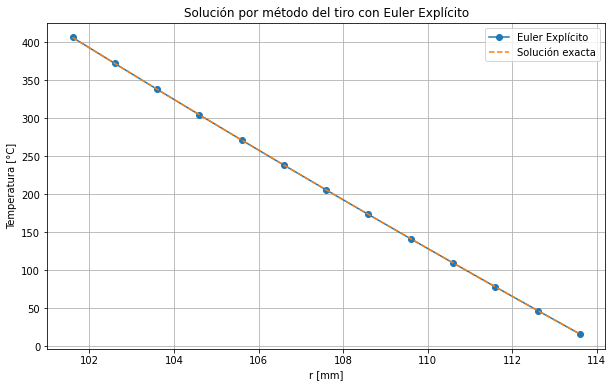

Derivada inicial encontrada (s): -34.2405240298
Error final: 0.0000000000 춿C
        2 | -34.2405 |   16.000000 | 0.000000

Error final real: 0.000000000000

游늳 Errores punto a punto respecto a la soluci칩n exacta:
Paso | r        | u_num      | u_exact    | Error
------------------------------------------------------
   0 |   101.60 |   406.0000 |   406.0000 |   0.0000
   1 |   102.60 |   371.7595 |   371.7845 |   0.0250
   2 |   103.60 |   337.8560 |   337.9009 |   0.0449
   3 |   104.60 |   304.2829 |   304.3428 |   0.0599
   4 |   105.60 |   271.0339 |   271.1040 |   0.0701
   5 |   106.60 |   238.1028 |   238.1785 |   0.0757
   6 |   107.60 |   205.4835 |   205.5604 |   0.0769
   7 |   108.60 |   173.1702 |   173.2440 |   0.0738
   8 |   109.60 |   141.1572 |   141.2239 |   0.0667
   9 |   110.60 |   109.4390 |   109.4946 |   0.0556
  10 |   111.60 |    78.0102 |    78.0509 |   0.0407
  11 |   112.60 |    46.8656 |    46.8877 |   0.0221
  12 |   113.60 |    16.0000 |    16.0000 |  

In [55]:
r_vals, u_vals, s_final = metodo_del_tiro(h, euler_system)
r_exacto = np.linspace(R1, R2, 300)
T_exacto = T_exacta(r_exacto)
resultados["euler_solucion_exacta"] = (r_exacto, T_exacta)



# Graficamos
plt.figure(figsize=(10, 6))  # Aumenta el tama침o de la figura (ancho x alto en pulgadas)
plt.plot(r_vals, u_vals, 'o-', label='Euler Expl칤cito')
plt.plot(r_exacto, T_exacto, '--', label='Soluci칩n exacta')
plt.xlabel('r [mm]')
plt.ylabel('Temperatura [춿C]')
plt.title('Soluci칩n por m칠todo del tiro con Euler Expl칤cito')
plt.legend()
plt.grid()
plt.show()

print(f"Derivada inicial encontrada (s): {s_final:.10f}")
print(f"Error final: {abs(u_vals[-1] - T2):.10f} 춿C")

imprimir_resultados_metodo_del_tiro(r_vals, u_vals, s_final)




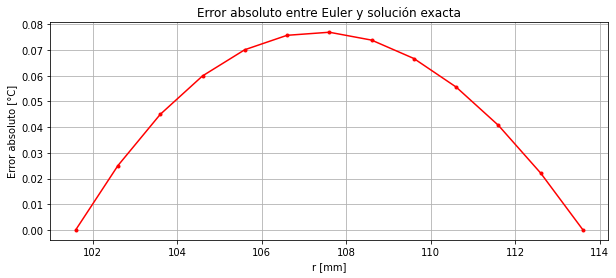

In [56]:

# Interpolamos la soluci칩n exacta en los mismos puntos que u_vals
T_interp = T_exacta(r_vals)
error = np.abs(u_vals - T_interp)

plt.figure(figsize=(10, 4))
plt.plot(r_vals, error, 'r.-')
plt.xlabel('r [mm]')
plt.ylabel('Error absoluto [춿C]')
plt.title('Error absoluto entre Euler y soluci칩n exacta')
plt.grid()
plt.show()


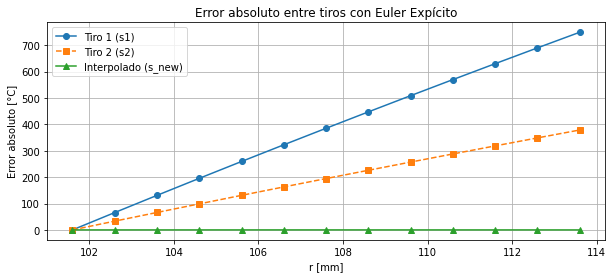

In [57]:
# Obtener los resultados de cada tiro
r1, u1 = resultados["euler_explicito_tiro_1"]
r2, u2 = resultados["euler_explicito_tiro_2"]
r3, u3 = resultados["euler_explicito_tiro_3"]
r_exacto, T_exacta = resultados["euler_solucion_exacta"]

# Interpolamos la soluci칩n exacta en los mismos puntos que u_vals
T_interp = T_exacta(r_vals)
error1 = np.abs(u1 - T_interp)
error2 = np.abs(u2 - T_interp)
error3 = np.abs(u3 - T_interp)



plt.figure(figsize=(10, 4))
plt.plot(r1, error1, 'o-', label='Tiro 1 (s1)')
plt.plot(r2, error2, 's--', label='Tiro 2 (s2)')
plt.plot(r3, error3,'^-', label='Interpolado (s_new)')

plt.xlabel('r [mm]')
plt.ylabel('Error absoluto [춿C]')
plt.title('Error absoluto entre tiros con Euler Exp칤cito')
plt.legend()
plt.grid()
plt.show()


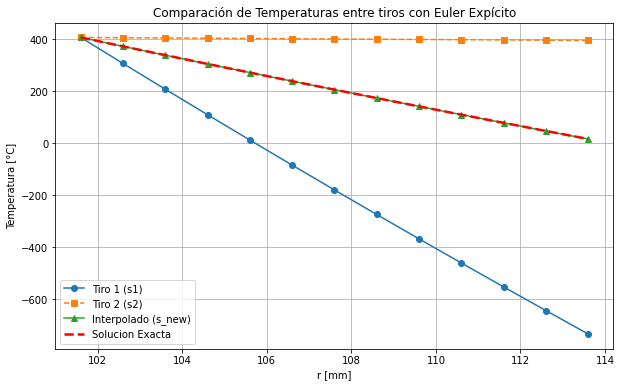

In [58]:
# Obtener los resultados de cada tiro
r1, u1 = resultados["euler_explicito_tiro_1"]
r2, u2 = resultados["euler_explicito_tiro_2"]
r3, u3 = resultados["euler_explicito_tiro_3"]

u_exacta = []
for r in r1:
    u_exacta.append(T_exacta(r))

#r_exacto, T_exacta = resultados["euler_solucion_exacta"]



plt.figure(figsize=(10, 6))
plt.plot(r1, u1, 'o-', label='Tiro 1 (s1)')
plt.plot(r2, u2, 's--', label='Tiro 2 (s2)')
plt.plot(r3, u3, '^-', label='Interpolado (s_new)')
plt.plot(r1, u_exacta, '--', label='Solucion Exacta', color='red',  linewidth=2.5)

plt.xlabel('r [mm]')
plt.ylabel('Temperatura [춿C]')
plt.title('Comparaci칩n de Temperaturas entre tiros con Euler Exp칤cito')
plt.legend()
plt.grid()
plt.show()




### Tolerancia Euler Explicito < 0.02

In [59]:
tolerance_reduction(1, euler_system, 0.02)


=== Ejecutando con h = 0.50000 mm ===
M치ximo error punto a punto: 0.038202 춿C

=== Ejecutando con h = 0.25000 mm ===
M치ximo error punto a punto: 0.019065 춿C

=== Ejecutando con h = 0.37500 mm ===
M치ximo error punto a punto: 0.028626 춿C

=== Ejecutando con h = 0.31250 mm ===
M치ximo error punto a punto: 5.761156 춿C

=== Ejecutando con h = 0.28125 mm ===
M치ximo error punto a punto: 2.881766 춿C

=== Ejecutando con h = 0.26562 mm ===
M치ximo error punto a punto: 6.720426 춿C

=== Ejecutando con h = 0.25781 mm ===
M치ximo error punto a punto: 3.601836 춿C

=== Ejecutando con h = 0.25391 mm ===
M치ximo error punto a punto: 5.761156 춿C

=== Ejecutando con h = 0.25195 mm ===
M치ximo error punto a punto: 2.881766 춿C

=== Ejecutando con h = 0.25098 mm ===
M치ximo error punto a punto: 1.441180 춿C

=== Ejecutando con h = 0.25049 mm ===
M치ximo error punto a punto: 0.720664 춿C

=== Ejecutando con h = 0.25024 mm ===
M치ximo error punto a punto: 0.360351 춿C

=== Ejecutando con h = 0.25012 mm ===
M치ximo error 

## M칠todo de Euler Impl칤cito

### Sistema de ecuaciones

Redefinimos la segunda orden como un sistema de primer orden usando:

- $$ u = T $$
- $$ v = \frac{du}{dr} = T' $$

Entonces:

$$
\begin{cases}
\frac{du}{dr} = v \\
\frac{dv}{dr} = -\frac{v}{r}
\end{cases}
$$


$$       
u_{n+1} = u_{n} + h \cdot v_{n+1}
$$
$$
v_{n+1} = v_{n} + h \cdot \left(-\frac{v_{n+1}}{r_{n+1}}\right)
$$

In [60]:
def euler_implicit(s, h):
    r = R1
    u = T1
    v = s

    r_values = [r]
    u_values = [u]
    v_values = [v]

    n = 0
    while r < R2:
        #print(u, v)
        v = v / (1 + h / r)
        u = u + h * v 
        r = R1 + h * (n + 1)
        n += 1

        r_values.append(r)
        u_values.append(u)
        v_values.append(v)

    # Imprimir errores respecto a soluci칩n exacta
    #print("\nPaso | r        | u_num      | u_exact    | Error")
    #print("------------------------------------------------------")
    for i in range(len(r_values)):
        r_i = r_values[i]
        u_i = u_values[i]
        u_exact = u_real(r_i)
        error = abs(u_i - u_exact)
        #print(f"{i:4d} | {r_i:8.2f} | {u_i:10.4f} | {u_exact:10.4f} | {error:8.4f}")

    return np.array(r_values), np.array(u_values)
#euler_implicit(-1,1)


### Resultados y comparaci칩n con soluci칩n exacta

Graficamos la soluci칩n obtenida por Euler y la soluci칩n exacta:


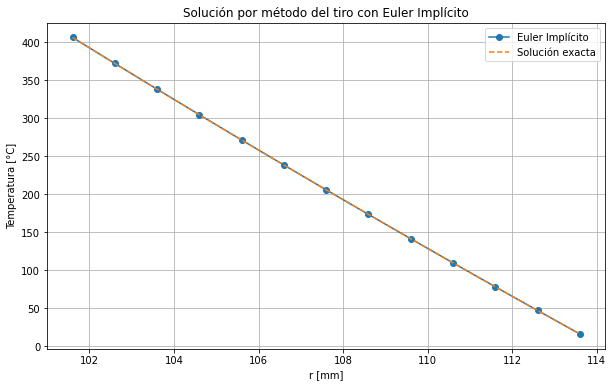

Derivada inicial encontrada (s): -34.5439411165
Error final: 0.0000000000 춿C
        2 | -34.5439 |   16.000000 | 0.000000

Error final real: 0.000000000000

游늳 Errores punto a punto respecto a la soluci칩n exacta:
Paso | r        | u_num      | u_exact    | Error
------------------------------------------------------
   0 |   101.60 |   406.0000 |   406.0000 |   0.0000
   1 |   102.60 |   371.7927 |   371.7845 |   0.0082
   2 |   103.60 |   337.9157 |   337.9009 |   0.0148
   3 |   104.60 |   304.3625 |   304.3428 |   0.0197
   4 |   105.60 |   271.1270 |   271.1040 |   0.0230
   5 |   106.60 |   238.2033 |   238.1785 |   0.0249
   6 |   107.60 |   205.5856 |   205.5604 |   0.0253
   7 |   108.60 |   173.2683 |   173.2440 |   0.0243
   8 |   109.60 |   141.2458 |   141.2239 |   0.0219
   9 |   110.60 |   109.5129 |   109.4946 |   0.0183
  10 |   111.60 |    78.0642 |    78.0509 |   0.0134
  11 |   112.60 |    46.8949 |    46.8877 |   0.0073
  12 |   113.60 |    16.0000 |    16.0000 |  

In [61]:
h = 1

r_vals, u_vals, s_final = metodo_del_tiro(h, euler_implicit)

# Soluci칩n exacta para comparar
def T_exacta(r):
    return (T1 - T2) * np.log(R2 / r) / np.log(R2 / R1) + T2

r_exacto = np.linspace(R1, R2, 300)
T_exacto = T_exacta(r_exacto)

# Graficamos
plt.figure(figsize=(10, 6))  # Aumenta el tama침o de la figura (ancho x alto en pulgadas)
plt.plot(r_vals, u_vals, 'o-', label='Euler Impl칤cito')
plt.plot(r_exacto, T_exacto, '--', label='Soluci칩n exacta')
plt.xlabel('r [mm]')
plt.ylabel('Temperatura [춿C]')
plt.title('Soluci칩n por m칠todo del tiro con Euler Impl칤cito')
plt.legend()
plt.grid()
plt.show()

print(f"Derivada inicial encontrada (s): {s_final:.10f}")
print(f"Error final: {abs(u_vals[-1] - T2):.10f} 춿C")

imprimir_resultados_metodo_del_tiro(r_vals, u_vals, s_final)




### Tolerancia

In [69]:
tolerance_reduction(1,euler_implicit, 0.02, 2)


=== Ejecutando con h = 0.50000 mm ===
M치ximo error punto a punto: 0.012642 춿C

=== Ejecutando con h = 0.75000 mm ===
M치ximo error punto a punto: 0.018955 춿C

Paso final elegido: 0.75000 mm con error m치ximo de 0.018955 춿C
        2 | -34.5038 |   16.000000 | 0.000000

Error final real: 0.000000000000

游늳 Errores punto a punto respecto a la soluci칩n exacta:
Paso | r        | u_num      | u_exact    | Error
------------------------------------------------------
   0 |   101.60 |   406.0000 |   406.0000 |   0.0000
   1 |   102.35 |   380.3118 |   380.3070 |   0.0047
   2 |   103.10 |   354.8104 |   354.8016 |   0.0088
   3 |   103.85 |   329.4932 |   329.4811 |   0.0121
   4 |   104.60 |   304.3576 |   304.3428 |   0.0148
   5 |   105.35 |   279.4008 |   279.3841 |   0.0168
   6 |   106.10 |   254.6205 |   254.6024 |   0.0181
   7 |   106.85 |   230.0142 |   229.9953 |   0.0188
   8 |   107.60 |   205.5793 |   205.5604 |   0.0190
   9 |   108.35 |   181.3136 |   181.2951 |   0.0185
  10 |

## RK2


### codigo

In [65]:
# Implementaci칩n de RK2 para el sistema
def rk2_system(s, h):
    r_values = [R1]
    u_values = [T1]
    v_values = [s]

    r = R1
    u = T1
    v = s

    while r < R2:
        q1u = h * v
        q1v = h* (-v / r)
        
        q2u = h* (v + q1v)
        q2v = h* (-(v + q1v) / (r))
        
        u = u + ((q1u + q2u) / 2)
        v = v + ((q1v + q2v) / 2)
        r = r + h

        r_values.append(r)
        u_values.append(u)
        v_values.append(v)




    # Imprimir errores respecto a soluci칩n exacta
    #print("\nPaso | r        | u_num      | u_exact    | Error")
    #print("------------------------------------------------------")
    for i in range(len(r_values)):
        r_i = r_values[i]
        u_i = u_values[i]
        u_exact = u_real(r_i)
        error = abs(u_i - u_exact)
        #print(f"{i:4d} | {r_i:8.2f} | {u_i:10.4f} | {u_exact:10.4f} | {error:8.4f}")

    return np.array(r_values), np.array(u_values)


#rk2_system(-1,1)


### Resultados

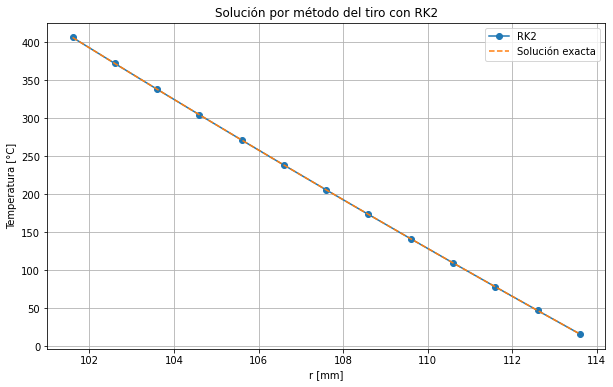

Derivada inicial encontrada (s): -34.3929455106
Error final: 0.0000000000 춿C
        2 | -34.3929 |   16.000000 | 0.000000

Error final real: 0.000000000000

游늳 Errores punto a punto respecto a la soluci칩n exacta:
Paso | r        | u_num      | u_exact    | Error
------------------------------------------------------
   0 |   101.60 |   406.0000 |   406.0000 |   0.0000
   1 |   102.60 |   371.7763 |   371.7845 |   0.0082
   2 |   103.60 |   337.8862 |   337.9009 |   0.0147
   3 |   104.60 |   304.3232 |   304.3428 |   0.0196
   4 |   105.60 |   271.0810 |   271.1040 |   0.0230
   5 |   106.60 |   238.1536 |   238.1785 |   0.0248
   6 |   107.60 |   205.5352 |   205.5604 |   0.0252
   7 |   108.60 |   173.2198 |   173.2440 |   0.0242
   8 |   109.60 |   141.2020 |   141.2239 |   0.0219
   9 |   110.60 |   109.4764 |   109.4946 |   0.0182
  10 |   111.60 |    78.0375 |    78.0509 |   0.0133
  11 |   112.60 |    46.8804 |    46.8877 |   0.0073
  12 |   113.60 |    16.0000 |    16.0000 |  

In [66]:
r_vals, u_vals, s_final = metodo_del_tiro(h, rk2_system)




u_exacta = []
for r in r_vals:
    u_exacta.append(T_exacta(r))


r_exacto = np.linspace(R1, R2, 300)
T_exacto = T_exacta(r_exacto)

plt.figure(figsize=(10, 6))
plt.plot(r_vals, u_vals, 'o-', label='RK2')
plt.plot(r_vals, u_exacta, '--', label='Soluci칩n exacta')
plt.xlabel('r [mm]')
plt.ylabel('Temperatura [춿C]')
plt.title('Soluci칩n por m칠todo del tiro con RK2')
plt.legend()
plt.grid()


plt.show()


print(f"Derivada inicial encontrada (s): {s_final:.10f}")
print(f"Error final: {abs(u_vals[-1] - T2):.10f} 춿C")

imprimir_resultados_metodo_del_tiro(r_vals, u_vals, s_final)


### Cambio de paso h en RK2


In [67]:
tolerance_reduction(1, rk2_system, 0.02, 2)


=== Ejecutando con h = 0.50000 mm ===
M치ximo error punto a punto: 0.012631 춿C

=== Ejecutando con h = 0.75000 mm ===
M치ximo error punto a punto: 0.018931 춿C

Paso final elegido: 0.75000 mm con error m치ximo de 0.018931 춿C
        2 | -34.3906 |   16.000000 | 0.000000

Error final real: 0.000000000000

游늳 Errores punto a punto respecto a la soluci칩n exacta:
Paso | r        | u_num      | u_exact    | Error
------------------------------------------------------
   0 |   101.60 |   406.0000 |   406.0000 |   0.0000
   1 |   102.35 |   380.3023 |   380.3070 |   0.0047
   2 |   103.10 |   354.7929 |   354.8016 |   0.0088
   3 |   103.85 |   329.4690 |   329.4811 |   0.0121
   4 |   104.60 |   304.3281 |   304.3428 |   0.0147
   5 |   105.35 |   279.3674 |   279.3841 |   0.0167
   6 |   106.10 |   254.5844 |   254.6024 |   0.0181
   7 |   106.85 |   229.9765 |   229.9953 |   0.0188
   8 |   107.60 |   205.5414 |   205.5604 |   0.0189
   9 |   108.35 |   181.2767 |   181.2951 |   0.0185
  10 |